<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=152287345" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.5 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=d3ac6e3112b3db4c5f79e67d6b5204da5012cc1e4479ee3ef399c705fe26d104
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158930,1.818915,0.119264,1.897071,14.116199,12.507758,14.600480,17.558665,2.298412,0.637008,...,0.139144,4.185058,3.876479,3.966004,3.762815,0.430110,6.332406,0.455729,0.937300,0.000663
2014-11-25,12.043282,1.818942,0.119656,1.901467,14.117642,12.535600,14.637411,17.609105,2.300726,0.638920,...,0.138817,4.219638,3.876876,3.979042,3.763300,0.430416,6.362738,0.456409,0.940737,0.000661
2014-11-26,12.044852,1.817978,0.119892,1.907322,14.106092,12.534650,14.672576,17.641244,2.297930,0.640013,...,0.138703,4.223002,3.874768,3.999799,3.759319,0.430852,6.384003,0.456582,0.942102,0.000660
2014-11-27,12.057550,1.823941,0.119975,1.903116,14.144001,12.473314,14.664769,17.626837,2.303424,0.638721,...,0.139076,4.219067,3.885181,3.987371,3.769422,0.431614,6.411605,0.457809,0.944634,0.000662
2014-11-28,12.073199,1.829147,0.119494,1.909385,14.198496,12.430242,14.707965,17.678528,2.311222,0.640542,...,0.139818,4.241522,3.899936,3.997324,3.783441,0.432485,6.396295,0.458312,0.948527,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,13.987954,2.741430,0.143545,2.042769,21.377170,15.548079,24.120390,23.352763,2.980095,0.954527,...,0.074615,5.167250,5.872849,4.707073,5.703012,0.592001,0.743347,0.678748,0.584555,0.000884
2023-11-21,14.001686,2.742817,0.143660,2.041776,21.389008,15.589190,24.177601,23.329538,2.996137,0.954795,...,0.074656,5.170111,5.876101,4.697990,5.706018,0.592329,0.743479,0.681765,0.584879,0.000886
2023-11-22,14.007334,2.749506,0.143060,2.047124,21.428099,15.648504,24.198769,23.340057,2.998980,0.957369,...,0.074793,5.179560,5.886840,4.696158,5.716599,0.593412,0.744135,0.680776,0.585947,0.000885


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== CZK ========================================
2023-11-25 16:55:58,601 - Unknown integration target: 
2023-11-25 16:56:06,243 - Unknown integration target: 
2023-11-25 16:56:14,176 - Unknown integration target: 
2023-11-25 16:56:21,653 - Unknown integration target: 
2023-11-25 16:56:29,198 - Unknown integration target: 
2023-11-25 16:56:45,958 - Unknown integration target: 
2023-11-25 16:57:02,742 - Unknown integration target: 
2023-11-25 16:57:19,841 - Unknown integration target: 
2023-11-25 16:57:22,043 - Unknown integration target: 
2023-11-25 16:57:22,046 - Unknown integration target: 
2023-11-25 16:57:29,628 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.6 MiB, max: 263.2 MiB
2023-11-25 16:57:29,637 - ApiComposer - Initial pipeline was fitted in 5.3 sec.
2023-11-25 16:57:29,646 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 17:27:31,940 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [30:02<?, ?gen/s]

2023-11-25 17:27:31,973 - ApiComposer - Hyperparameters tuning started with 21 min. timeout


2023-11-25 17:27:38,319 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, glm, data_source_ts/CZK, sgdr, ransac_lin_reg, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/CZK - {}
sgdr - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 10} 
Initial metric: 0.002
  0%|          | 163/100000 [19:41<214:09:21,  7.72s/trial, best loss: 0.0021238114698198286]
2023-11-25 17:48:33,214 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, glm, data_source_ts/CZK, sgdr, ransac_lin_reg, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/CZK - {}
sgdr - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 10}
2023-11-25 17:48:33,218 - PipelineTuner - Final metric: 0.002
2023-11-2

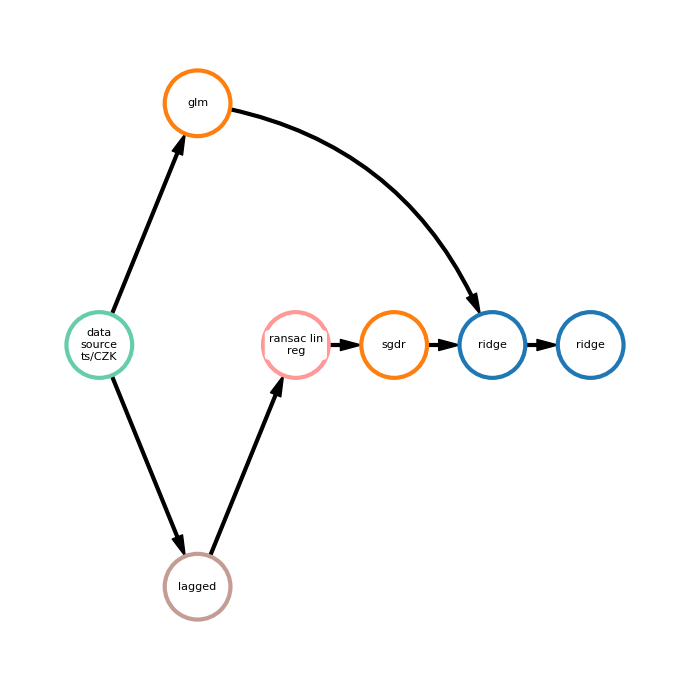

[0.83175936 0.83180129 0.8318495  0.83190109 0.83195322 0.83200681
 0.83206151 0.832113   0.83216753 0.83222125]
{'mae': 0.004, 'mape': 0.005}


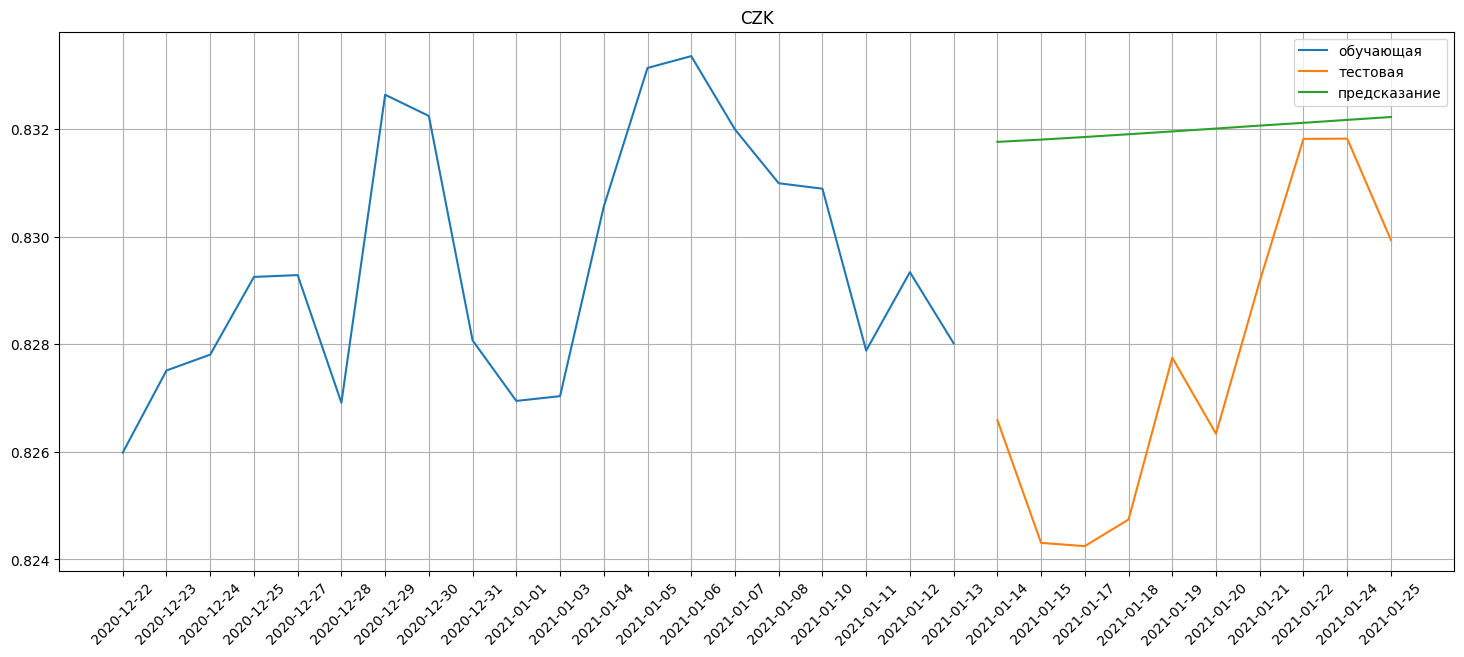


======================================== KZT ========================================
2023-11-25 17:49:24,188 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.6 MiB
2023-11-25 17:49:24,198 - ApiComposer - Initial pipeline was fitted in 9.3 sec.
2023-11-25 17:49:24,219 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 17:49:24,321 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin_

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 18:13:37,683 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [24:13<?, ?gen/s]

2023-11-25 18:13:37,714 - ApiComposer - Hyperparameters tuning started with 36 min. timeout


2023-11-25 18:13:46,126 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/KZT, ridge, lagged]}
ridge - {'alpha': 0.7082430965760026}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/KZT - {}
ridge - {'alpha': 0.871995677825607}
lagged - {'window_size': 3.9965988806824297} 
Initial metric: 0.000
  0%|          | 203/100000 [34:02<293:22:05, 10.58s/trial, best loss: 0.00019231862854109043]
2023-11-25 18:49:23,839 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/KZT, ridge, lagged]}
ridge - {'alpha': 0.7082430965760026}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/KZT - {}
ridge - {'alpha': 0.871995677825607}
lagged - {'window_size': 3.9965988806824297}
2023-11-25 18:49:23,845 - PipelineTuner - Final metric: 0.000
2023-11-25 18:49:23,861 - ApiComposer - Hyperparameters tuning finished
2023-11-25 18:49:24,305 - ApiComposer - Model generatio

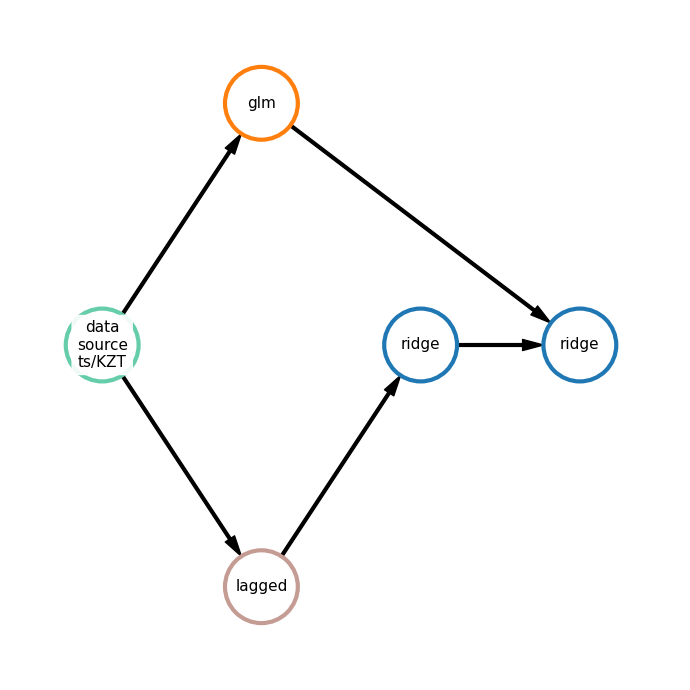

[0.04293037 0.04292901 0.04292791 0.04292674 0.04292619 0.04292562
 0.04292508 0.04292468 0.04292412 0.04292367 0.04292327 0.04292326
 0.04292347 0.04292396 0.04292428 0.04292422]
{'mae': 0.0, 'mape': 0.002}


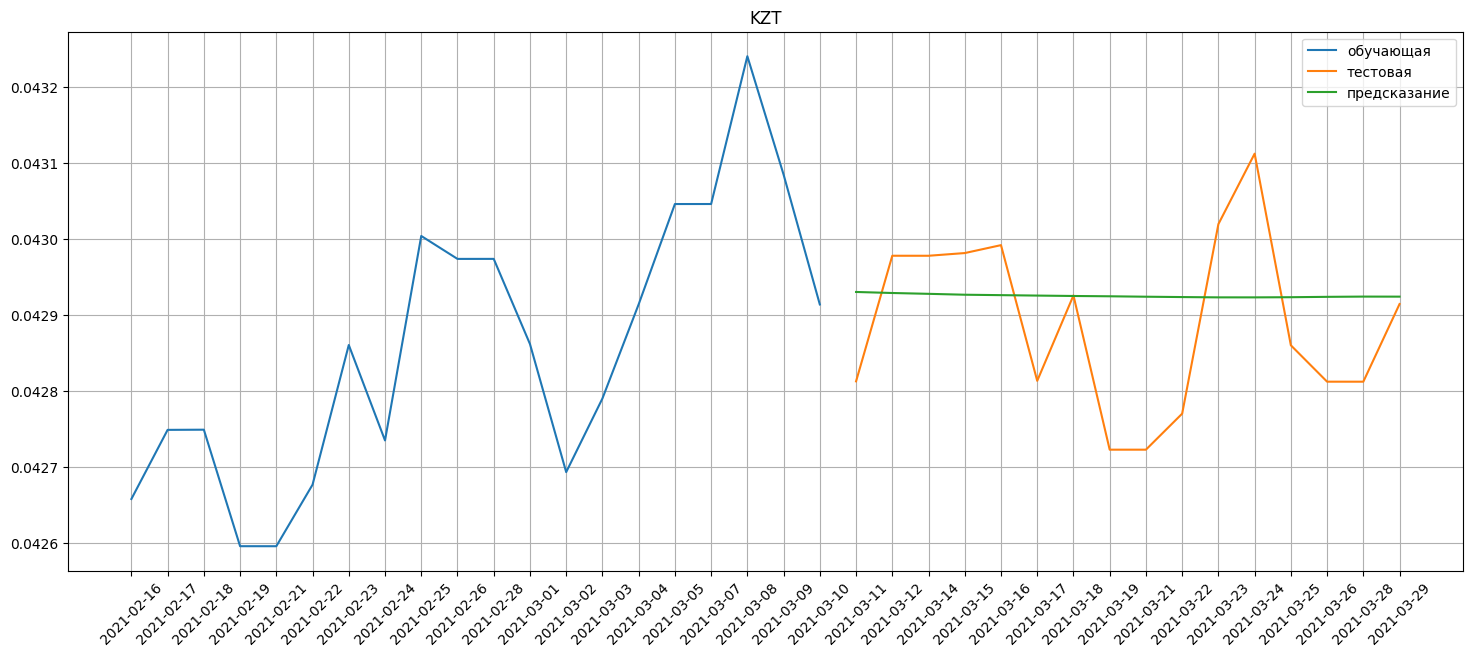


======================================== USD ========================================
2023-11-25 18:50:34,192 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.6 MiB
2023-11-25 18:50:34,198 - ApiComposer - Initial pipeline was fitted in 13.5 sec.
2023-11-25 18:50:34,203 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 18:50:34,242 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 42 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 19:15:46,268 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:12<?, ?gen/s]

2023-11-25 19:15:46,297 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-25 19:16:01,512 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 6, 'nodes': [linear, poly_features, fast_ica, ridge, lagged, data_source_ts/USD]}
linear - {}
poly_features - {}
fast_ica - {'whiten': 'unit-variance'}
ridge - {'alpha': 4.61558312332831}
lagged - {'window_size': 10}
data_source_ts/USD - {} 
Initial metric: 0.406
  0%|          | 63/100000 [14:30<456:00:01, 16.43s/trial, best loss: 0.13120750990980534]
2023-11-25 19:32:48,253 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 6, 'nodes': [linear, poly_features, fast_ica, ridge, lagged, data_source_ts/USD]}
linear - {}
poly_features - {'degree': 4, 'interaction_only': True}
fast_ica - {'whiten': 'unit-variance', 'fun': 'logcosh', 'n_components': 6}
ridge - {'alpha': 7.856611584532248}
lagged - {'window_size': 119}
data_source_ts/USD - {}
2023-11-25 19:32:48,258 - PipelineTuner - Final metric: 0.131
2023-11-25 19:32:48,268 - ApiComposer - Hyperparameters tuning finished
2023-11-25 19:32:48,721 - ApiC

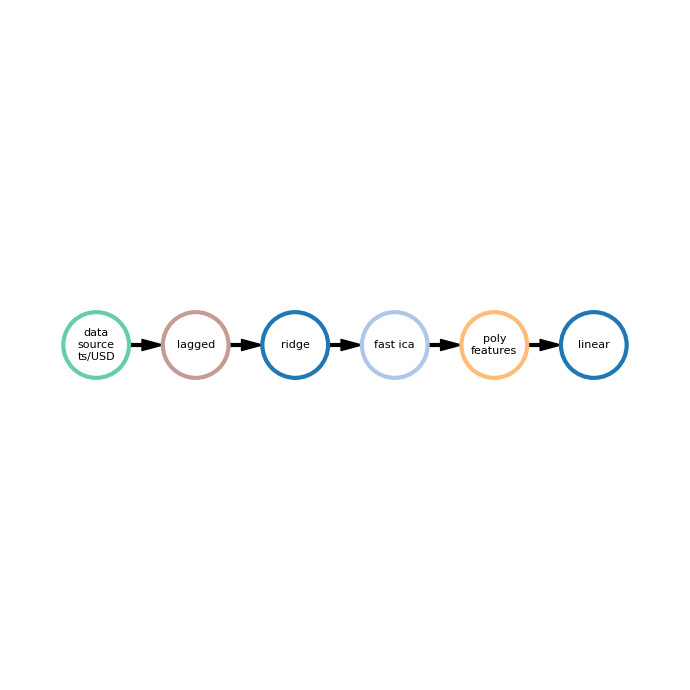

[21.191655   21.16826715 21.14119201 21.11036307 21.06599988 20.99807951
 20.93094562 20.91348393 20.95368625 21.030383   21.07519234 21.11386749
 21.17429689 21.23097057 21.25911414 21.24282916 21.22439637 21.22290815]
{'mae': 0.163, 'mape': 0.008}


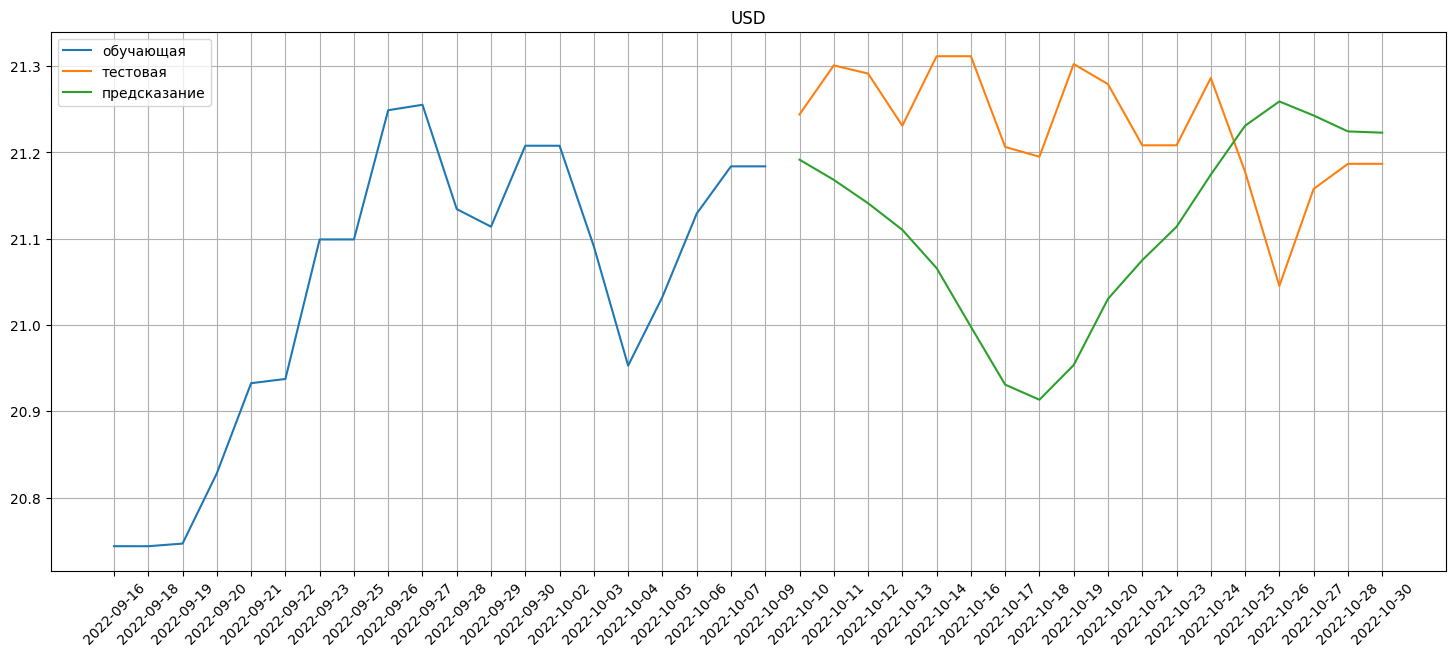


======================================== AED ========================================
2023-11-25 19:33:50,042 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.5 MiB
2023-11-25 19:33:50,046 - ApiComposer - Initial pipeline was fitted in 14.4 sec.
2023-11-25 19:33:50,050 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 19:33:50,072 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 33 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 19:53:41,606 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [19:51<?, ?gen/s]

2023-11-25 19:53:41,632 - ApiComposer - Hyperparameters tuning started with 13 min. timeout


2023-11-25 19:53:53,817 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [sgdr, ridge, glm, data_source_ts/AED, ridge, ransac_lin_reg, sparse_lagged]}
sgdr - {}
ridge - {'alpha': 7.680748533885474}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/AED - {}
ridge - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
sparse_lagged - {'window_size': 6, 'n_components': 0.14249142899046885, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 0.029
  0%|          | 40/100000 [10:50<602:12:08, 21.69s/trial, best loss: 0.020481586473062193]
2023-11-25 20:07:12,016 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [sgdr, ridge, glm, data_source_ts/AED, ridge, ransac_lin_reg, sparse_lagged]}
sgdr - {}
ridge - {'alpha': 7.680748533885474}
glm - {'family': 'gamma', 'link': 'identity'}
data_source_ts/AED - {}
ridge - {'alpha': 7.272188140163205}
ransac_lin_reg - {'min_samples'

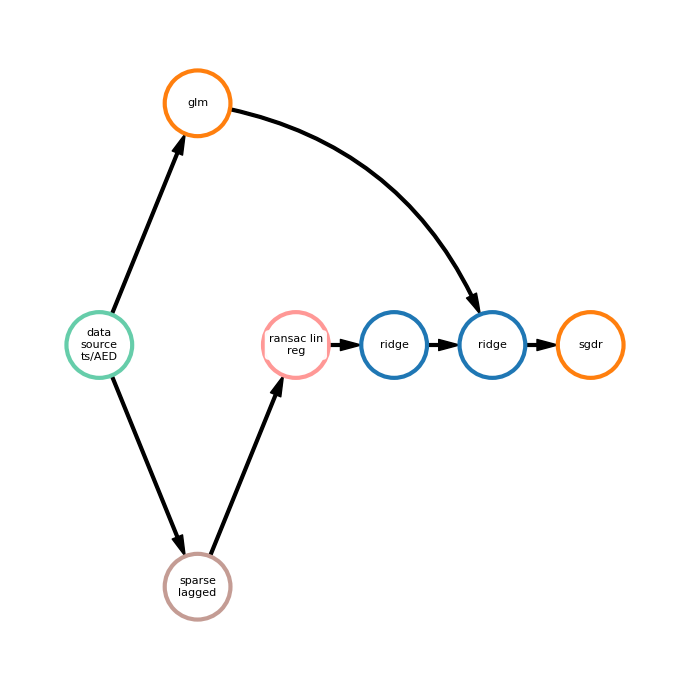

[5.62690746 5.62119891 5.62278213 5.63486506 5.62952744]
{'mae': 0.017, 'mape': 0.003}


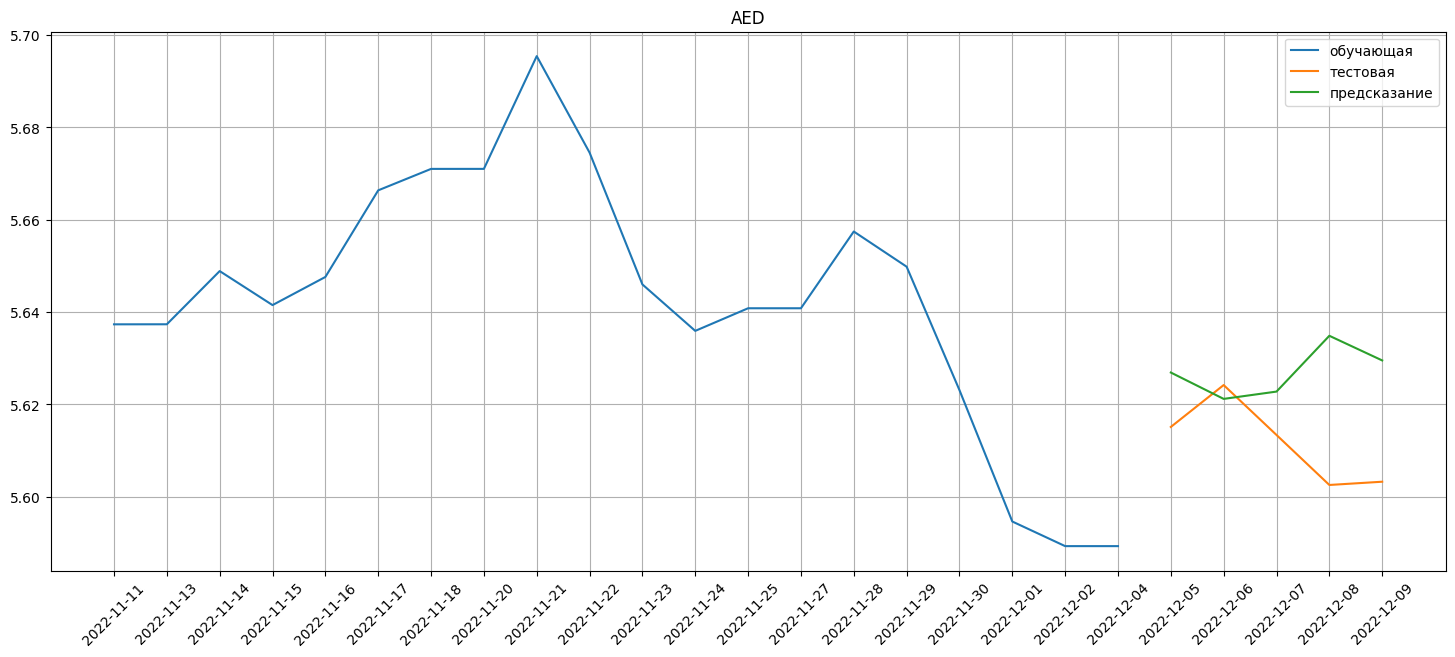


======================================== CLP ========================================
2023-11-25 20:07:58,154 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.9 MiB
2023-11-25 20:07:58,174 - ApiComposer - Initial pipeline was fitted in 14.3 sec.
2023-11-25 20:07:58,180 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 20:07:58,216 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 38 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 20:30:11,623 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [22:13<?, ?gen/s]

2023-11-25 20:30:11,655 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-11-25 20:30:25,411 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [linear, ridge, glm, data_source_ts/CLP, sgdr, lagged]}
linear - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
sgdr - {}
lagged - {'window_size': 10} 
Initial metric: 0.000
  0%|          | 57/100000 [13:09<466:16:45, 16.80s/trial, best loss: 0.00043428431830565056]
2023-11-25 20:46:04,108 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [linear, ridge, glm, data_source_ts/CLP, sgdr, lagged]}
linear - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
sgdr - {}
lagged - {'window_size': 10}
2023-11-25 20:46:04,113 - PipelineTuner - Final metric: 0.000
2023-11-25 20:46:04,122 - ApiComposer - Hyperparameters tuning finished
2023-11-25 20:46:04,544 - ApiComposer - Model generation finished
2023-11-25 20:46:18,668 - FEDOT logger - Final pipeline was fitted
2023-11-25 20:46:18,674 - FEDOT logger - Final

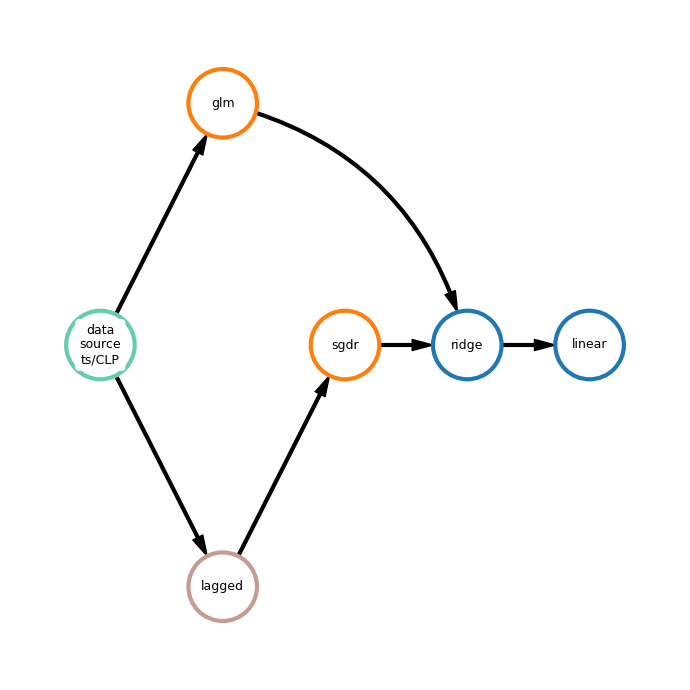

[0.02188331 0.02185047 0.02184117 0.02184832 0.02191472 0.02177596
 0.02185714 0.02208567 0.02181685 0.02180171 0.02183104 0.02207398
 0.02177453]
{'mae': 0.001, 'mape': 0.035}


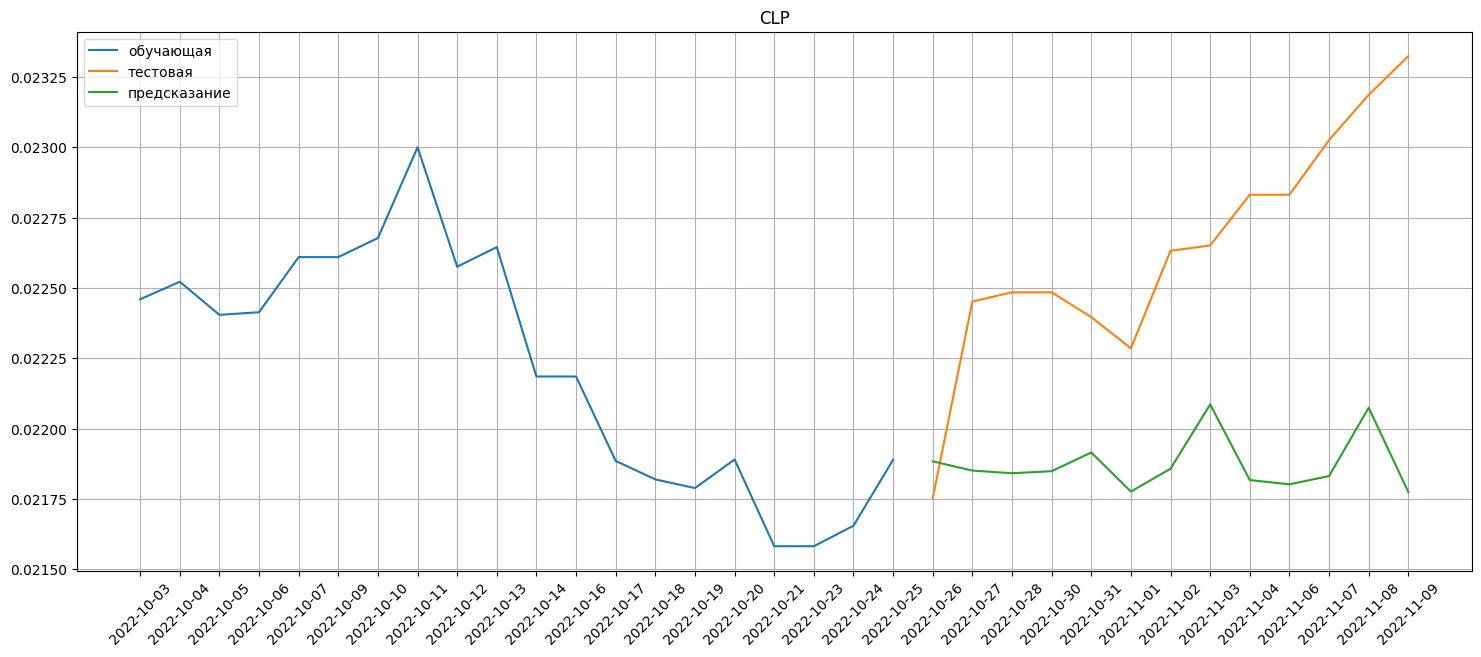


======================================== HUF ========================================
2023-11-25 20:46:39,421 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.3 MiB
2023-11-25 20:46:39,425 - ApiComposer - Initial pipeline was fitted in 10.5 sec.
2023-11-25 20:46:39,430 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 20:46:39,452 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 15 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-25 20:54:01,452 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [07:21<?, ?gen/s]

2023-11-25 20:54:01,492 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-25 20:54:37,314 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/HUF, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/HUF - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 13/100000 [01:56<1081:27:34, 38.94s/trial, best loss: 0.00020069573768881002]
2023-11-25 21:02:23,039 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/HUF, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'reg_alpha': 3.769181290196819e-08, 'reg_lambda': 5.488121702113343}
ridge - {'alpha': 9

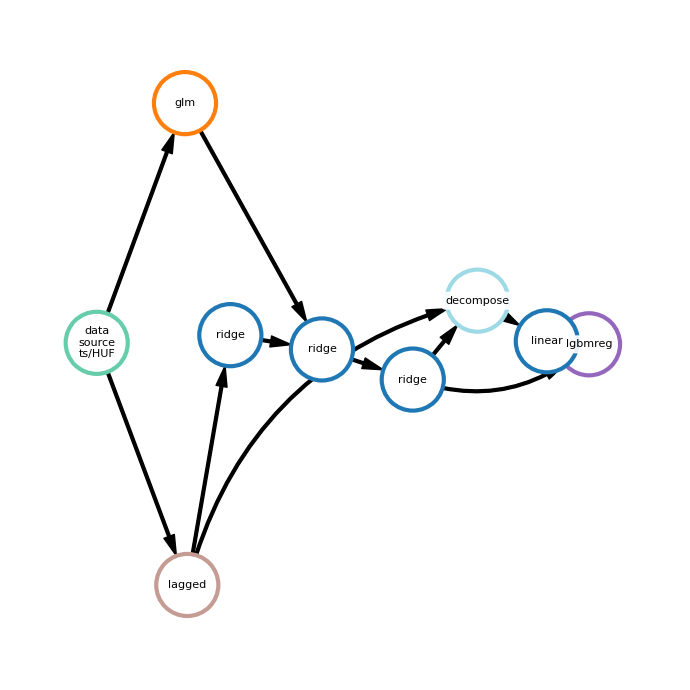

[0.06114856 0.06120049 0.06126922 0.06124693 0.06119691]
{'mae': 0.0, 'mape': 0.006}


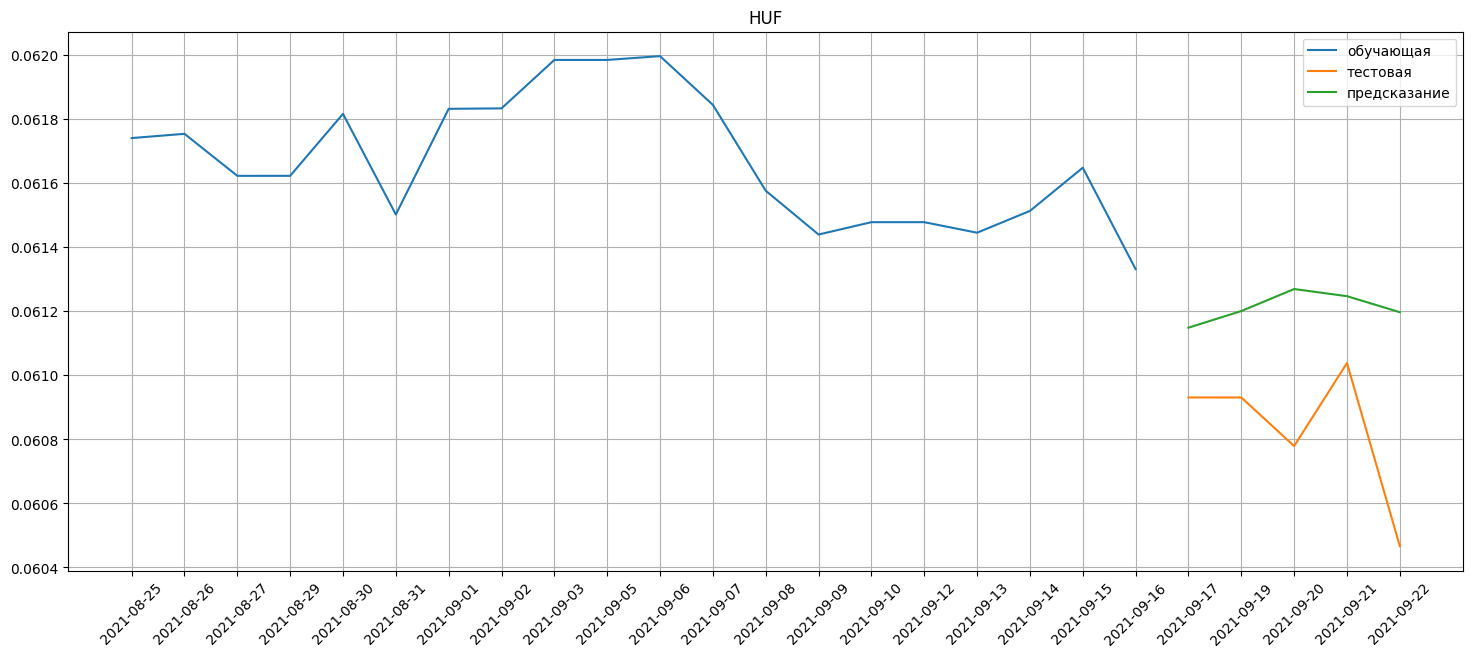


======================================== ZAR ========================================
2023-11-25 21:03:11,576 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.6 MiB
2023-11-25 21:03:11,582 - ApiComposer - Initial pipeline was fitted in 8.4 sec.
2023-11-25 21:03:11,586 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 21:03:11,626 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 53 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin_

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-25 21:25:19,957 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [22:08<?, ?gen/s]

2023-11-25 21:25:19,990 - ApiComposer - Hyperparameters tuning started with 31 min. timeout


2023-11-25 21:25:46,001 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/ZAR, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ZAR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.009
  0%|          | 64/100000 [26:43<824:14:41, 29.69s/trial, best loss: 0.006693356438227491]
2023-11-25 21:57:01,940 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/ZAR, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1, 'bootstrap': True, 'max_features': 0.9870839074048325, 'min_samples_leaf': 15, 'min_samples_split': 11}
ridge - {'alpha': 5.708000375725106}
ridge - {'alpha': 1.2181448798593193}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/ZAR - {}
ridge - {'alpha': 2.8454003812900854}
lagged - {'window_size': 315}
linear - {}
decompose

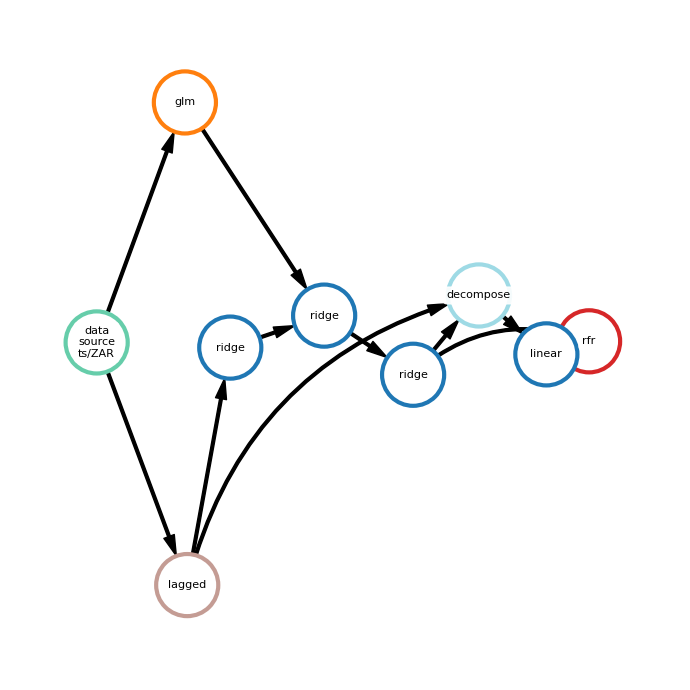

[1.19358113 1.19419182 1.19414565 1.19393206 1.19354955 1.1925974
 1.19228063 1.19193597 1.19187672 1.19149121 1.19088947 1.19066203
 1.19136574 1.19267287 1.19326526 1.19338192 1.19386348]
{'mae': 0.015, 'mape': 0.013}


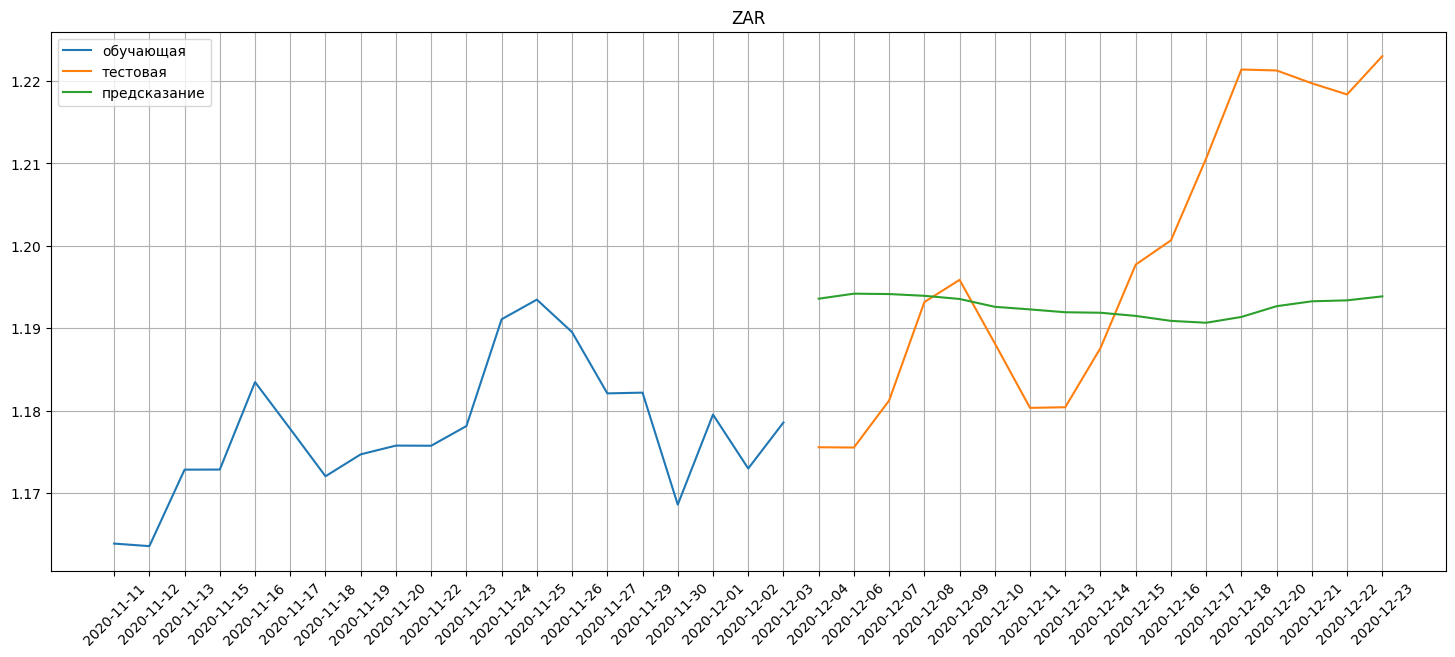


======================================== GBP ========================================
2023-11-25 21:57:52,281 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.4 MiB
2023-11-25 21:57:52,287 - ApiComposer - Initial pipeline was fitted in 10.3 sec.
2023-11-25 21:57:52,291 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-25 21:57:52,331 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['sparse_lagged', 'gaussian_filter', 'glm', 'lagged', 'polyfit', 'ar', 'smoothing', 'cut', 'diff_filter', 'locf', 'ts_naive_average', 'ets', 'ransac_lin_reg', 'ransac_non_lin_reg', 'ridge', 'polyfit', 'ar', 'smoothing', 'cut', 'diff_filter', 'scaling', 'lasso', 'ets', 'glm', 'adareg', 'linear', 'sparse_lagged', 'gaussian_filter', 'rfr', 'sgdr', 'lagged', 'locf', 'ts_naive_average', 'normalization', 'pca', 'dtreg'].
2023-11-25

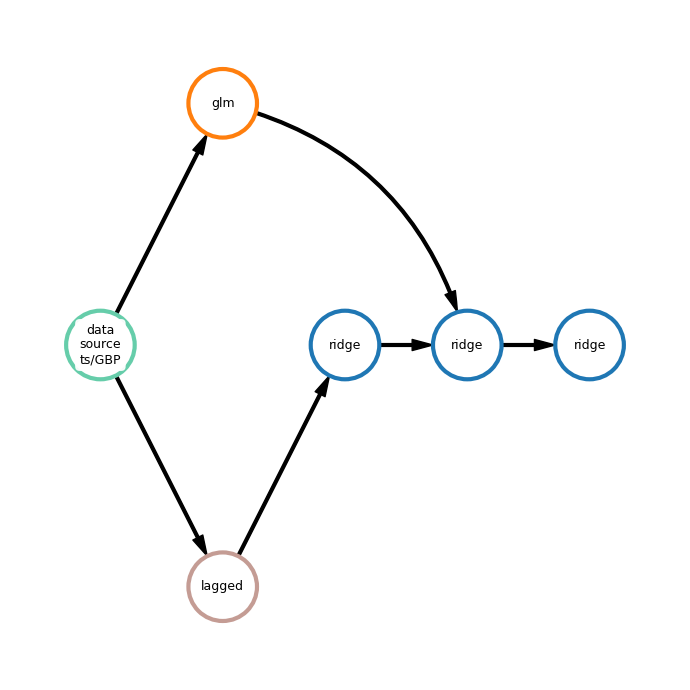

[25.12773478 25.12616086 25.12465125 25.12330849 25.12196564 25.12070759
 25.11943996 25.11813983 25.11703672 25.11644826 25.11582534 25.1152132
 25.11461101 25.11403537 25.11332453 25.11247621 25.11123824 25.11007706
 25.10912476 25.10823693]
{'mae': 0.05, 'mape': 0.002}


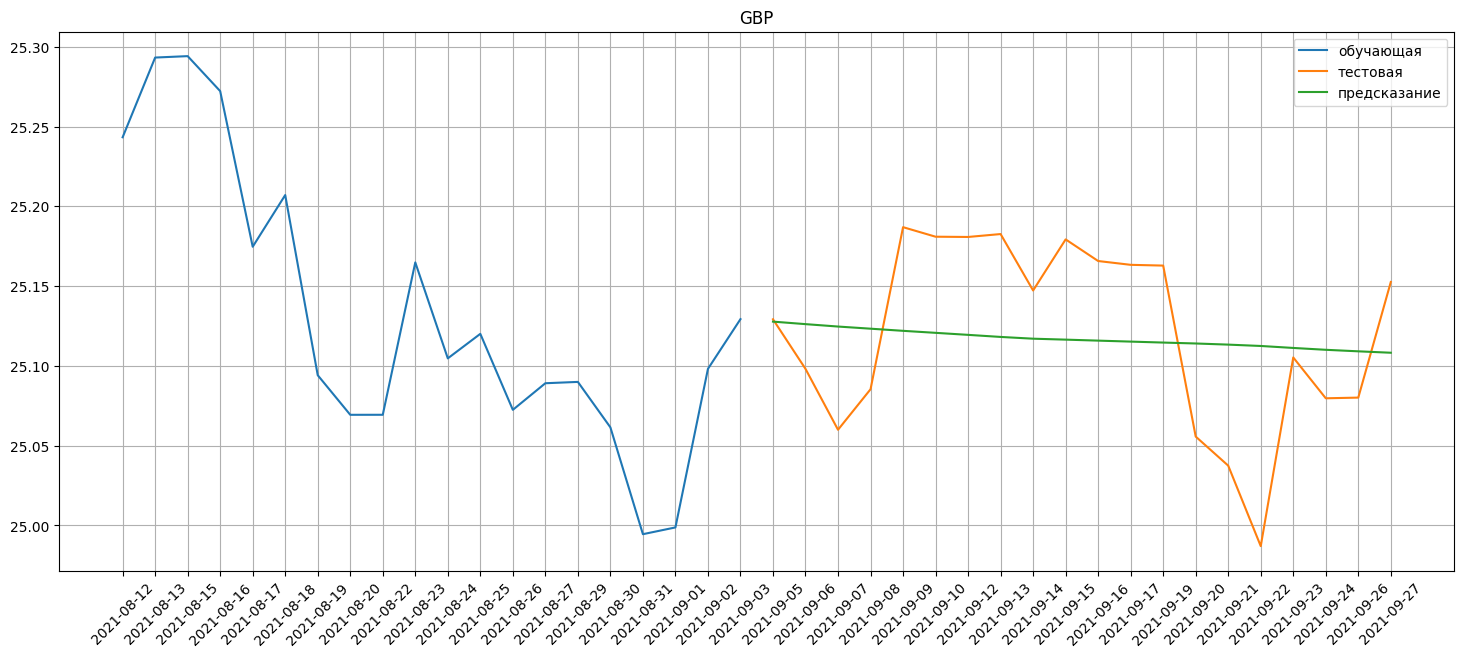


======================================== MXN ========================================
2023-11-25 21:59:29,975 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.4 MiB
2023-11-25 21:59:29,981 - ApiComposer - Initial pipeline was fitted in 8.0 sec.
2023-11-25 21:59:29,986 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-25 21:59:30,027 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 2 min. Set of candidate models: ['sparse_lagged', 'gaussian_filter', 'glm', 'lagged', 'polyfit', 'ar', 'smoothing', 'cut', 'diff_filter', 'locf', 'ts_naive_average', 'ets', 'ransac_lin_reg', 'ransac_non_lin_reg', 'ridge', 'polyfit', 'ar', 'smoothing', 'cut', 'diff_filter', 'scaling', 'lasso', 'ets', 'glm', 'adareg', 'linear', 'sparse_lagged', 'gaussian_filter', 'rfr', 'sgdr', 'lagged', 'locf', 'ts_naive_average', 'normalization', 'pca', 'dtreg'].
2023-11-25 

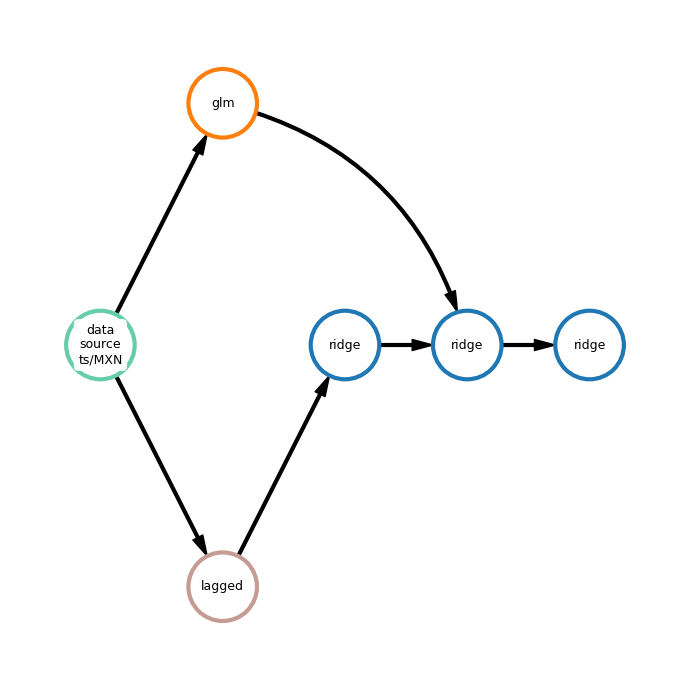

[0.89495068 0.89478453 0.89461886 0.89445684 0.89429705 0.89413159
 0.89395053 0.89377434 0.89358703 0.89339257 0.89318579 0.89296369
 0.8927353  0.89250678 0.89228053 0.89205099]
{'mae': 0.007, 'mape': 0.008}


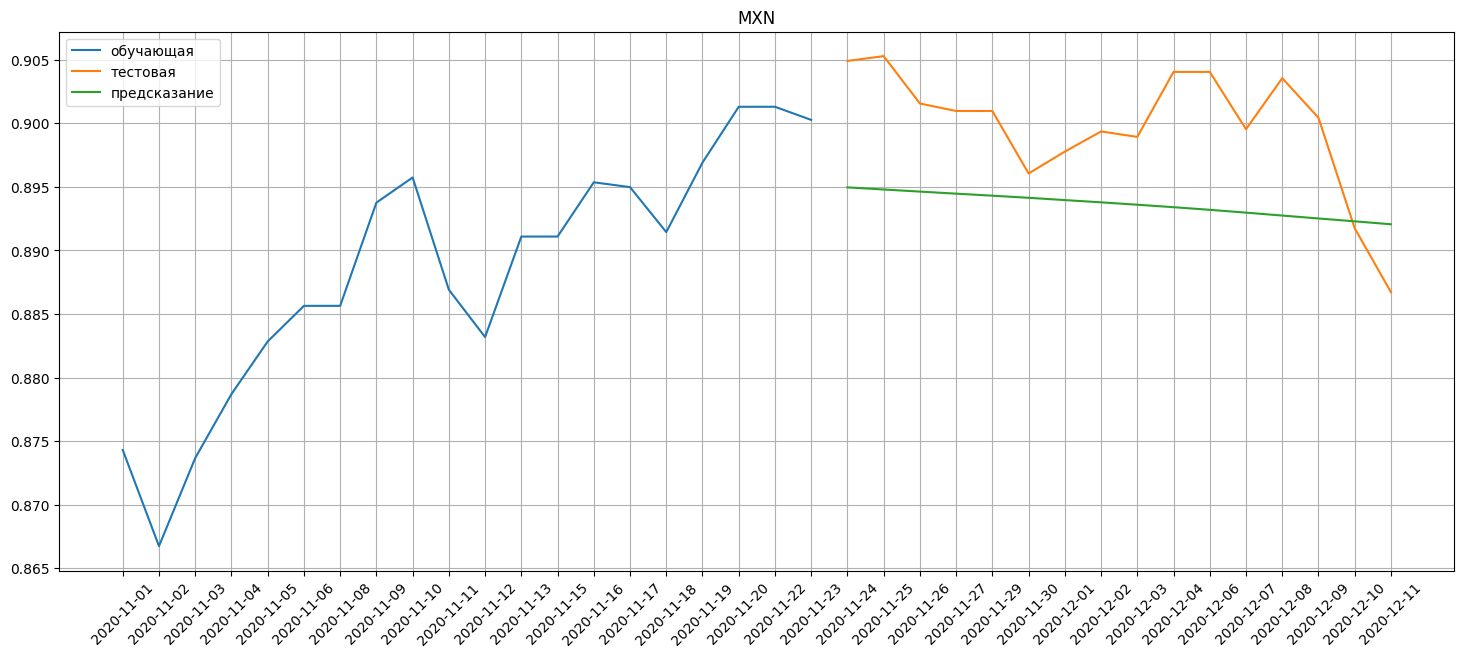


======================================== RUB ========================================
2023-11-25 22:01:56,560 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 1.8 MiB
2023-11-25 22:01:56,564 - ApiComposer - Initial pipeline was fitted in 8.5 sec.
2023-11-25 22:01:56,567 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 22:01:56,590 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 15 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin_

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-25 22:09:51,713 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [07:55<?, ?gen/s]

2023-11-25 22:09:51,739 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-25 22:10:13,368 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [svr, ridge, ridge, glm, data_source_ts/RUB, ridge, lagged, linear, decompose]}
svr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.002
  0%|          | 17/100000 [03:03<726:29:11, 26.16s/trial, best loss: 0.009278504105896548]
2023-11-25 22:17:30,751 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [svr, ridge, ridge, glm, data_source_ts/RUB, ridge, lagged, linear, decompose]}
svr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-25 22:17:30,754 - PipelineTuner - Final metric: 0.002
2023-11-25 22:17:30,759 - ApiComposer - Hyperparameters tuning finished
2023-11-25 22:17:31,168 - ApiComposer - Model generation fini

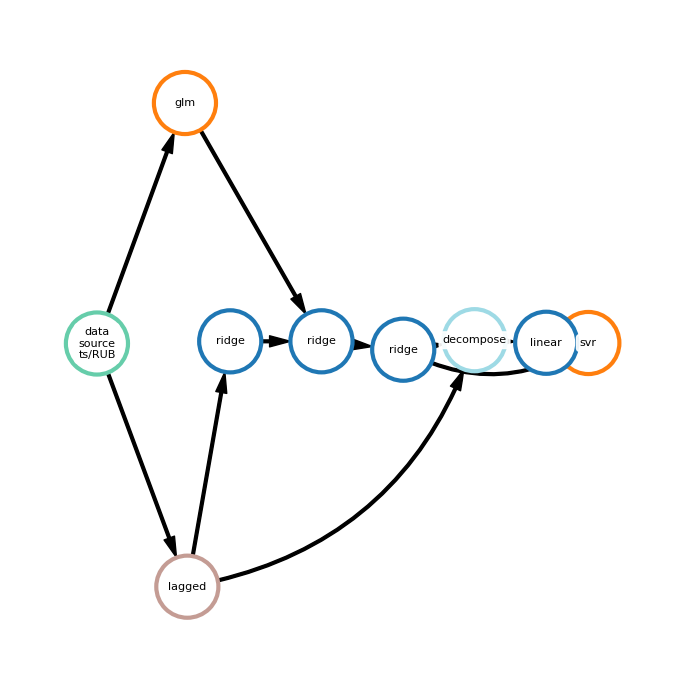

[0.24064551 0.23995588]
{'mae': 0.0, 'mape': 0.002}


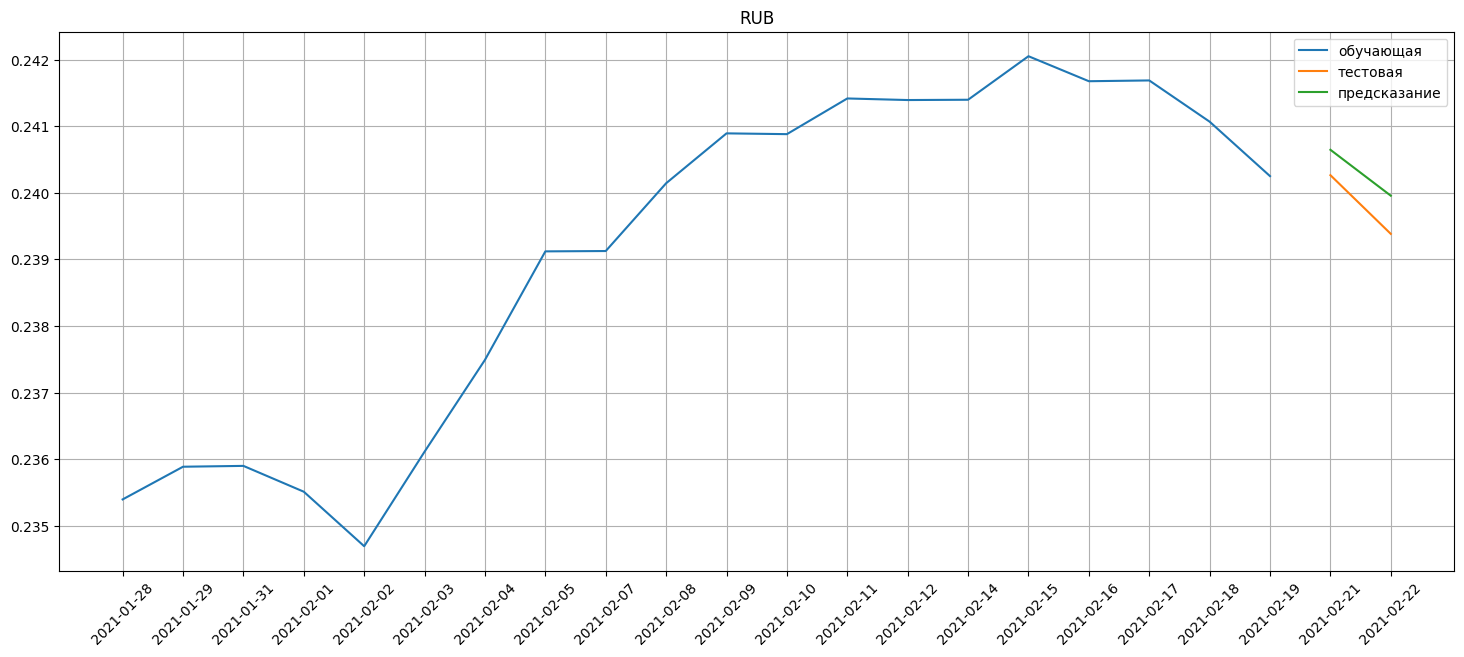


======================================== TRY ========================================
2023-11-25 22:18:10,975 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.8 MiB
2023-11-25 22:18:10,980 - ApiComposer - Initial pipeline was fitted in 13.1 sec.
2023-11-25 22:18:10,984 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 22:18:11,024 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 35 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-25 22:38:33,770 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [20:22<?, ?gen/s]

2023-11-25 22:38:33,800 - ApiComposer - Hyperparameters tuning started with 14 min. timeout


2023-11-25 22:38:43,997 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TRY, ridge, sparse_lagged]}
ridge - {'alpha': 0.45460834223334146}
ridge - {'alpha': 0.1755708201511361}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/TRY - {}
ridge - {'alpha': 9.416825531518912}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.046
  0%|          | 59/100000 [12:39<430:03:17, 15.49s/trial, best loss: 0.040755190785027914]
2023-11-25 22:53:25,058 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TRY, ridge, sparse_lagged]}
ridge - {'alpha': 8.918340742598774}
ridge - {'alpha': 9.450837654851693}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/TRY - {}
ridge - {'alpha': 6.340222845183002}
sparse_lagged - {'window_size': 137, 'n_components': 0.40155424563964864, 'sparse_transform

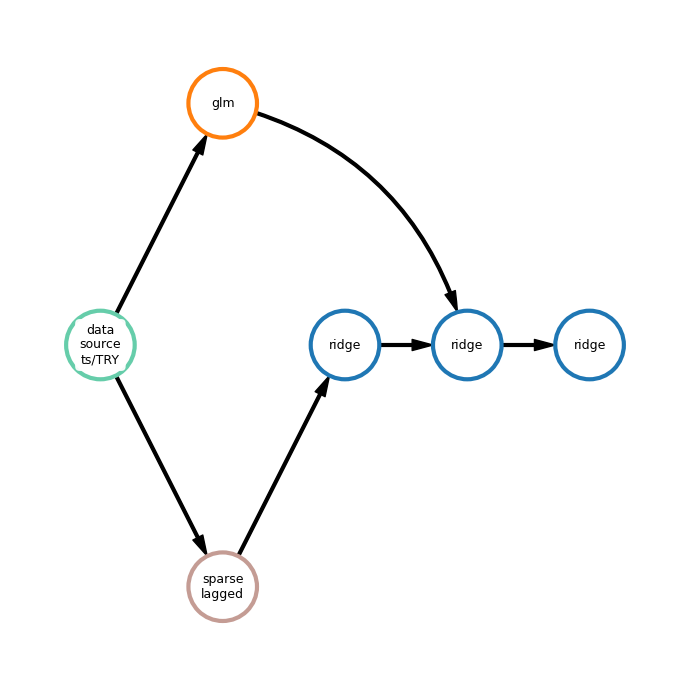

[1.12779982 1.12572169 1.123605   1.12146739 1.11934013 1.11724109
 1.11512762 1.11297901 1.11085032 1.10874848 1.10670917 1.10472434
 1.10277848 1.1008604  1.09901659 1.09719663 1.09542086 1.0936258
 1.09182529 1.09003499]
{'mae': 0.072, 'mape': 0.061}


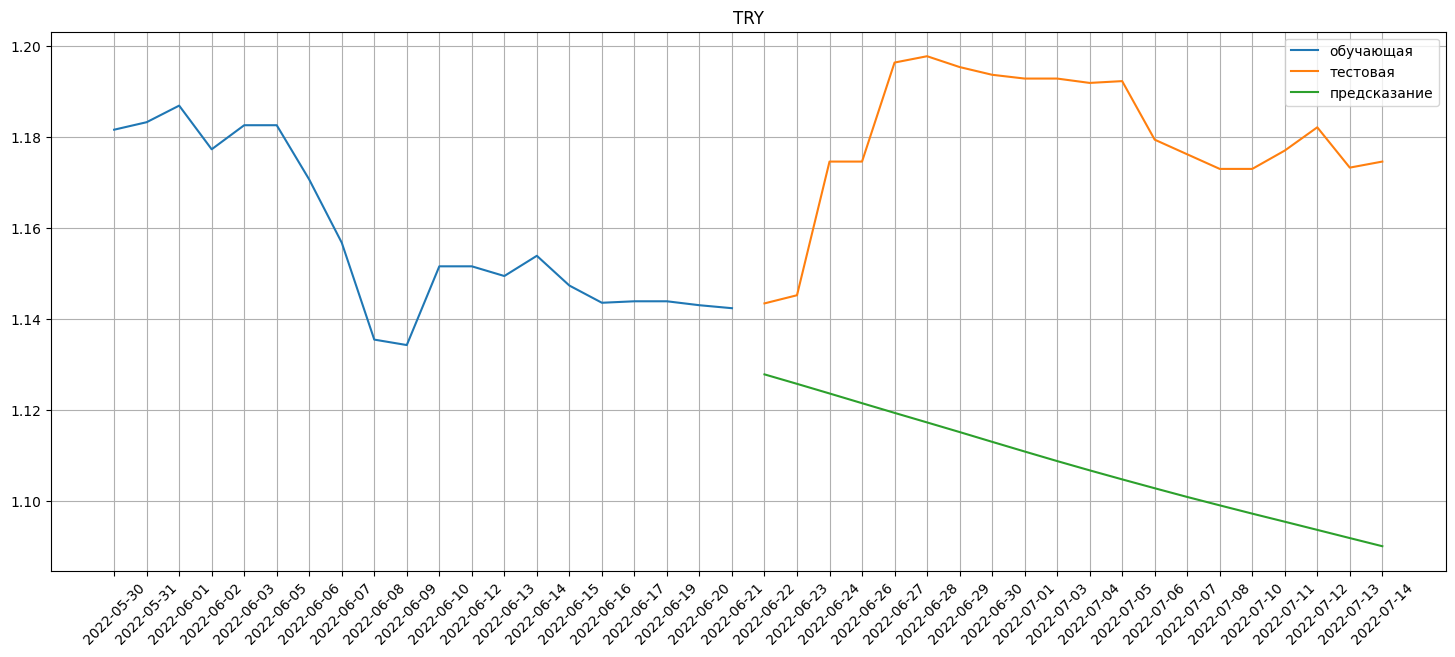


======================================== CZK ========================================
2023-11-25 22:53:56,668 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 5.0 MiB
2023-11-25 22:53:56,674 - ApiComposer - Initial pipeline was fitted in 14.4 sec.
2023-11-25 22:53:56,680 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-25 22:53:56,719 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'stl_arima', 'arima', 'polyfit', 'locf', 'ar', 'cut', 'clstm', 'smoothing', 'diff_filter', 'ts_naive_average', 'glm', 'exog_ts', 'fast_ica', 'ransac_non_lin_reg', 'ridge', 'stl_arima', 'cut', 'ets', 'glm', 'adareg', 'linear', 'svr', 'sparse_lagged', 'gbr', 'gaussian_filter', 'rfr', 'locf', 'treg', 'clstm', 'isolation_forest_reg', 'ts_naive_average', 'dtreg', 'ransac_lin

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-25 23:15:04,272 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [21:07<?, ?gen/s]

2023-11-25 23:15:04,293 - ApiComposer - Hyperparameters tuning started with 39 min. timeout


2023-11-25 23:15:14,905 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/CZK, dtreg, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
dtreg - {}
lagged - {'window_size': 10} 
Initial metric: 0.007
  0%|          | 177/100000 [36:35<364:35:54, 13.15s/trial, best loss: 0.006605067170484779]
2023-11-25 23:53:59,096 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/CZK, dtreg, lagged]}
ridge - {'alpha': 9.253525351450536}
ridge - {'alpha': 0.11956797137270503}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/CZK - {}
dtreg - {'max_depth': 11, 'min_samples_leaf': 14, 'min_samples_split': 6}
lagged - {'window_size': 68}
2023-11-25 23:53:59,102 - PipelineTuner - Final metric: 0.007
2023-11-25 23:53:59,127 - ApiComposer - Hyperparameters tuning finished
2023-11-25 23:53:59,572 - ApiComposer - Model generation finished
20

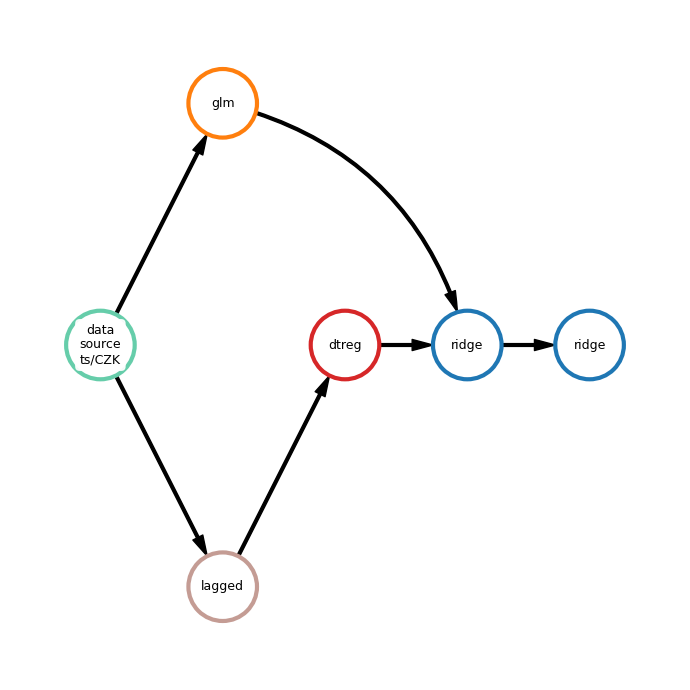

[0.83936821 0.83944663 0.83952786 0.83960073 0.83966789 0.83973305
 0.83979165 0.83984444 0.83989553 0.83994525 0.83998836 0.84002062
 0.84005402 0.84009236 0.84012824 0.84016196 0.84018169 0.84019633
 0.84022106 0.84023458]
{'mae': 0.011, 'mape': 0.013}


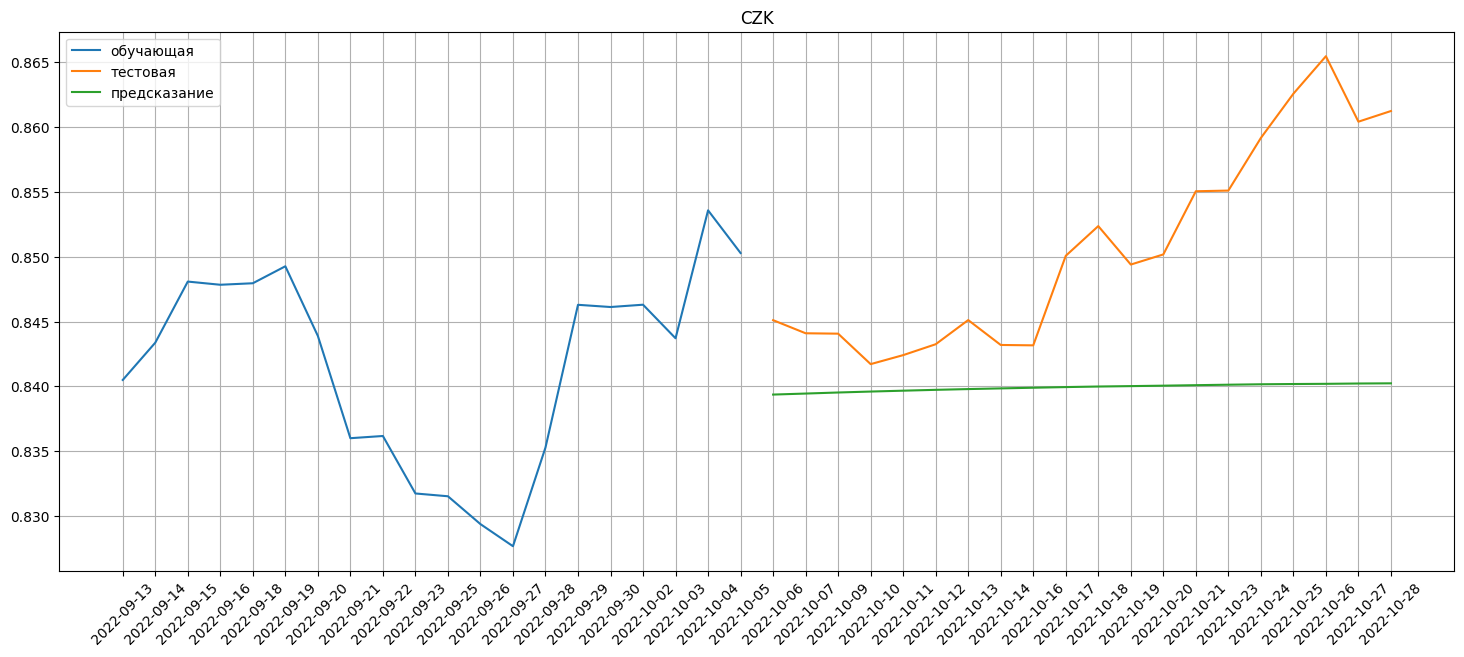

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
267,"(2023, 11, 25, 21, 57, 37, 5, 329, 0)",GBP,20,676,1,0.002
268,"(2023, 11, 25, 21, 59, 21, 5, 329, 0)",MXN,16,924,2,0.008
269,"(2023, 11, 25, 22, 1, 47, 5, 329, 0)",RUB,2,862,15,0.002
270,"(2023, 11, 25, 22, 17, 57, 5, 329, 0)",TRY,20,427,35,0.061


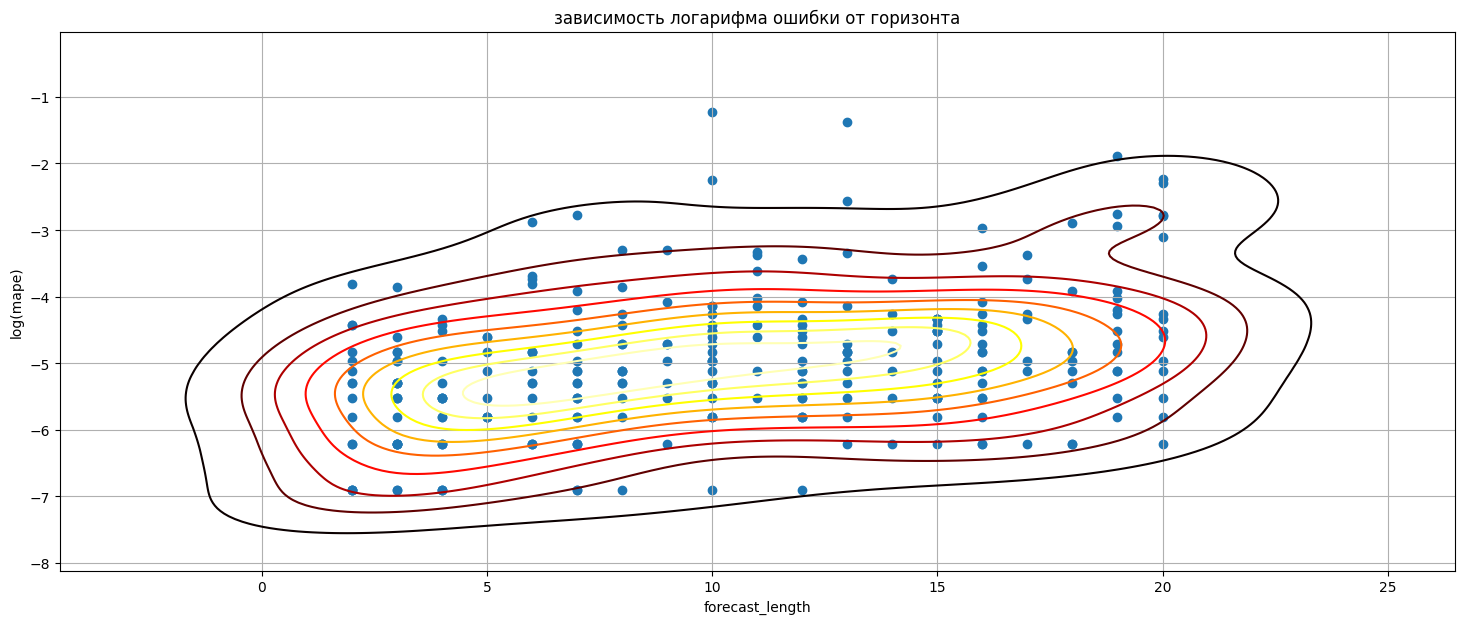

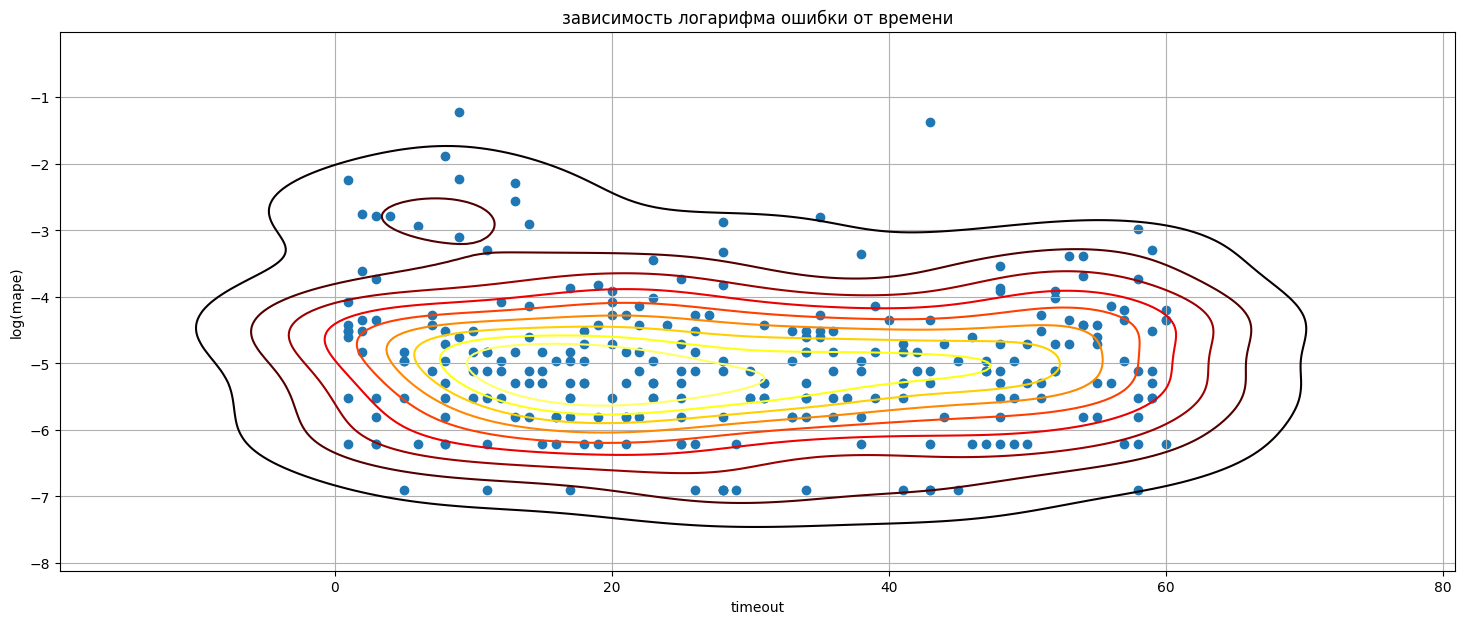

In [9]:
import seaborn as sns

rep['log(mape)'] = np.log(rep['mape'])

sns.kdeplot(data=rep,x='forecast_length',y='log(mape)',cmap='hot')
plt.scatter(rep['forecast_length'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от горизонта')
plt.grid()
plt.show()

sns.kdeplot(data=rep,x='timeout',y='log(mape)',cmap='hot')
plt.scatter(rep['timeout'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от времени')
plt.grid()
plt.show()